# Kaggle House Price Prob.

2018.08.04.Sat. Teddy

for Google Machine learning study

*******************************************************

## Content
### 1. Data Skimming

    1-0. Data collect
    1-1. Data load
    1-2. Data Skimming


### 2. Data Processing

    2-1. Drop
    2-2. Fill NAs
    2-3. Modify ( Adding, Editing, Binning etc..)
    
    
### 3. Model & Evaluation

    3-1 pipeline
    3-2 Model Selection & Evaluation
    3-3 Result
    
    
*******************************************************


## 1. Data Skimming

### 1-1 Data load

In [5]:
# Adding needed libraries and reading data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import ensemble, tree, linear_model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.utils import shuffle

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

train = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')

## 1-2 data Skimming(visualization)

In [6]:
# detailed
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [ ]:
sns.distplot(train.SalePrice)

In [ ]:
#skewness and kurtosis
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

In [ ]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea' ## 다른 feature들을 넣고 확인해 보면 됨, 
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [ ]:
train[var].dtype # pandas , describe, dtype etc 

In [ ]:
#box plot overallqual/saleprice
## boxplot : http://www.physics.csbsju.edu/stats/box2.html
var = 'OverallQual'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

In [ ]:
var = 'YearBuilt'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

In [ ]:
# Let's see at a glance

# correlation matrix
#correlation matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
## 빠져있는것들은 !

In [ ]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
## check point
1. overall Qual, GrLivArea, TotalBsmtSF
2. GarageCars & GarageArea
3. TotalBsmtSF and 1stFloor
4. Full Bath
5. TotRmsAbvGrd & GrLivArea
6. Year Built (time-series)

## 2. Data Processing

In [62]:
full = pd.concat([train,test],ignore_index=True)

### 2-1 drop

In [63]:
full.drop(['Id','Utilities', 'RoofMatl', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'Heating', 'LowQualFinSF',
               'BsmtFullBath', 'BsmtHalfBath', 'Functional', 'GarageYrBlt', 'GarageArea', 'GarageCond', 'WoodDeckSF',
               'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal'],
              axis=1, inplace=True)

### 2-2 Fill NAs

In [64]:
aa = full.isnull().sum()
aa[aa>0].sort_values(ascending=False)

Alley           2721
FireplaceQu     1420
LotFrontage      486
GarageFinish     159
GarageQual       159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MSZoning           4
TotalBsmtSF        1
Electrical         1
Exterior2nd        1
Exterior1st        1
KitchenQual        1
GarageCars         1
SaleType           1
dtype: int64

In [65]:
var = 'KitchenAbvGr'
a = set(train[var])
a 

{0, 1, 2, 3}

In [66]:
# numeric
cols=["TotalBsmtSF", "GarageCars"]
for col in cols:
    full[col].fillna(0, inplace=True)

#string
cols=["Alley", "FireplaceQu", "GarageType","GarageFinish","GarageQual", "BsmtExposure", "BsmtCond", "BsmtQual", "BsmtFinType2", "BsmtFinType1", "MasVnrType"]
for col in cols:
    full[col].fillna("None", inplace=True)

#1~2개 빠진거는
cols=["MSZoning", "Electrical", "KitchenQual", "SaleType","Exterior1st", "Exterior2nd"]
for col in cols:
    full[col].fillna(full[col].mode()[0], inplace=True)
    
#numeric 같은 경우
full['LotFrontage'] = full['LotFrontage'].fillna(full['LotFrontage'].mean())

In [67]:
full.isnull().sum()[full.isnull().sum()>0]

Series([], dtype: int64)

### 2-3 Editing

In [68]:
y_train = train.pop('SalePrice')

KeyError: 'SalePrice'

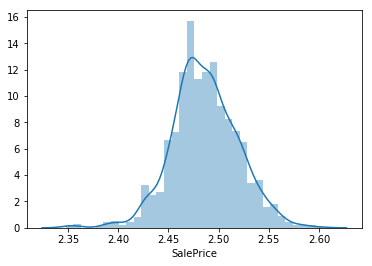

In [69]:
y_train_log = np.log(y_train)
ax = sns.distplot(y_train_log)

In [70]:
numeric_features = full.loc[:,['LotFrontage', 'LotArea', 'GrLivArea', 'TotalSF']]
numeric_features_standardized = (numeric_features - numeric_features.mean())/numeric_features.std()

In [71]:
full_st = full.copy()

In [72]:
full_st.update(numeric_features_standardized)

In [73]:
# convert data type (categorical)
cols=['MSSubClass','OverallCond','KitchenAbvGr','YrSold','MoSold']
for col in cols:
    full[col] = full[col].astype(str)

In [74]:
k = pd.concat([full['TotalBsmtSF'],full['1stFlrSF'],full['2ndFlrSF']],keys=[1,2,3],axis=1)
k.head(10)

,1,2,3
0,856.0,856,854
1,1262.0,1262,0
2,920.0,920,866
3,756.0,961,756
4,1145.0,1145,1053
5,796.0,796,566
6,1686.0,1694,0
7,1107.0,1107,983
8,952.0,1022,752
9,991.0,1077,0


In [75]:
# Adding total sqfootage feature and removing Basement, 1st and 2nd floor full
full['TotalSF'] = full['TotalBsmtSF'] + full['1stFlrSF'] + full['2ndFlrSF']
full.drop(['TotalBsmtSF', '1stFlrSF', '2ndFlrSF'], axis=1, inplace=True)

In [35]:
conditions = set()
for x,y in zip(full['Condition1'],full['Condition2']) :
    conditions.add(x+y)
conditions

dummies = pd.DataFrame(data=np.zeros((len(full.index), len(conditions))),
                       index=full.index, columns=conditions)

for i, cond in enumerate(full['Condition1']+full['Condition2']):
    dummies.ix[i,cond] = 1
    ##print cond 해볼 것.
## https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.ix.html
full = pd.concat([full, dummies.add_prefix('Conditions_')],axis = 1)
full.drop(['Condition1','Condition2'],axis=1, inplace=True)

In [36]:
exteriors = set()
for x,y in zip(full['Exterior1st'],full['Exterior2nd']) :
    exteriors.add(x+y)
exteriors

dummies = pd.DataFrame(data=np.zeros((len(full.index), len(exteriors))),
                       index=full.index, columns=exteriors)

for i, ext in enumerate(full['Exterior1st']+full['Exterior2nd']):
    dummies.ix[i,ext] = 1
    ##print cond 해볼 것.
## https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.ix.html
full = pd.concat([full, dummies.add_prefix('Exterior_')],axis = 1)
full.drop(['Exterior1st','Exterior2nd'],axis=1, inplace=True)

In [76]:
# Getting Dummies from all other categorical vars
for col in full.dtypes[full.dtypes == 'object'].index:
    for_dummy = full.pop(col)
    full = pd.concat([full, pd.get_dummies(for_dummy, prefix=col)], axis=1)

# 3. Model & Evaluation

### 3-1 pipeline

In [77]:
# Prints R2 and RMSE scores
def get_score(prediction, lables):    
    print('R2: {}'.format(r2_score(prediction, lables)))
    print('RMSE: {}'.format(np.sqrt(mean_squared_error(prediction, lables))))

# Shows scores for train and validation sets    
def train_test(estimator, x_trn, x_tst, y_trn, y_tst):
    prediction_train = estimator.predict(x_trn)
    # Printing estimator
    
    print(estimator)
    # Printing train scores
    get_score(prediction_train, y_trn)
    prediction_test = estimator.predict(x_tst)
    # Printing test scores
    print("Test")
    get_score(prediction_test, y_tst)

In [78]:
full2 = full.copy()

In [79]:
### Splitting features
n_train = train.shape[0]

train_features = full2[:n_train].select_dtypes(include=[np.number]).values
test_features = full2[n_train:].select_dtypes(include=[np.number]).values

### Splitting standardized features
train_features_st =full_st[:n_train].select_dtypes(include=[np.number]).values
test_features_st = full_st[n_train:].select_dtypes(include=[np.number]).values

In [86]:
train_features.size

411720

In [80]:
### Shuffling train sets
train_features_st, train_features, train_labels = shuffle(train_features_st, train_features, y_train_log, random_state = 5)

ValueError: Found input variables with inconsistent numbers of samples: [1460, 1460, 1314]

In [81]:
### Splitting
x_train, x_test, y_train, y_test = train_test_split(train_features, y_train_log, test_size=0.1, random_state=200)
x_train_st, x_test_st, y_train_st, y_test_st = train_test_split(train_features_st, y_train_log, test_size=0.1, random_state=200)

ValueError: Found input variables with inconsistent numbers of samples: [1460, 1314]

### 3-2 Model Selection & Evaluation

In [54]:
ENSTest = linear_model.ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10], l1_ratio=[.01, .1, .5, .9, .99], max_iter=5000).fit(x_train_st, y_train_st)
train_test(ENSTest, x_train_st, x_test_st, y_train_st, y_test_st)

ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10], copy_X=True,
       cv=None, eps=0.001, fit_intercept=True,
       l1_ratio=[0.01, 0.1, 0.5, 0.9, 0.99], max_iter=5000, n_alphas=100,
       n_jobs=1, normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0)
R2: -706.2568465557979
RMSE: 0.39613804322176804
Test
R2: -987.7031420351607
RMSE: 0.42526116782814816


In [55]:
scores = cross_val_score(ENSTest, train_features_st, y_train_log, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: -0.00 (+/- 0.01)


In [56]:
GBest = ensemble.GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=3, max_features='sqrt',
                                               min_samples_leaf=15, min_samples_split=10, loss='huber').fit(x_train, y_train)
train_test(GBest, x_train, x_test, y_train, y_test)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='huber', max_depth=3,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=15, min_samples_split=10,
             min_weight_fraction_leaf=0.0, n_estimators=3000,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)
R2: -0.047858454166266995
RMSE: 0.23394873283165693
Test
R2: -6.691573742947092
RMSE: 0.45507242241007956


In [57]:
scores = cross_val_score(GBest, train_features_st, train_labels, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.90 (+/- 0.04)


In [58]:
GB_model = GBest.fit(train_features, y_train_log)
ENST_model = ENSTest.fit(train_features_st, y_train_log)

In [60]:
Final_labels = (np.exp(GB_model.predict(test_features)))

In [61]:
pd.DataFrame({'Id': test.Id, 'SalePrice': Final_labels}).to_csv('2018-08-04_1.csv', index =False)